# 1. Adaboost【乳腺癌】

## 1.1 导包

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

## 1.2 加载数据【二分类】

In [17]:
X,y = datasets.load_breast_cancer(return_X_y=True)
display(X.shape,y.shape,np.unique(y))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

(569, 30)

(569,)

array([0, 1])

## 1.3 单次建模预测

In [ ]:
## 为了避免数据随机拆分的影响，设置了 train_test_split(X,y,test_size=0.2, random_state=42)

### 1.3.1 决策树

In [18]:
# 单一决策树
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display(y_pred[:20],y_test[:20])
# 准确率
accuracy_score(y_test,y_pred)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.9385964912280702

### 1.3.2 随机森林

In [19]:
# 随机森林
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display(y_pred[:20],y_test[:20])
# 准确率
accuracy_score(y_test,y_pred)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.9649122807017544

### 1.3.2 Adaboost

In [21]:
# Adaboost
model = AdaBoostClassifier(n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display(y_pred[:20],y_test[:20])
# 准确率
accuracy_score(y_test,y_pred)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

0.9736842105263158

## 1.4 循环100次取平均值

- 避免随机性的影响

### 1.4.1 决策树

In [23]:
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # 没设置随机种子
    model = DecisionTreeClassifier()
    # 训练
    model.fit(X_train,y_train)
    # 预测值
    y_pred = model.predict(X_test)
#     display(y_pred[:20],y_test[:20])
    # 准确率
    score += accuracy_score(y_test,y_pred)
# 准确率大约是：0.8947368421052632
print(score)  # 没除100，是93 不是0.93

93.10526315789463


### 1.4.2 随机森林

In [24]:
%%time
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    model = RandomForestClassifier(n_estimators=100)
    # 训练
    model.fit(X_train,y_train)
    # 预测
    y_pred = model.predict(X_test)
#     display(y_pred[:20],y_test[:20])
    # 准确率
    score += accuracy_score(y_test,y_pred)
# 准确率大约是：0.956140350877193
print(score)

95.9824561403508
CPU times: total: 39.9 s
Wall time: 44.4 s


### 1.4.3 Ababoost

In [26]:
%%time
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    model = AdaBoostClassifier(n_estimators=100)
    # 训练
    model.fit(X_train,y_train)
    # 预测
    y_pred = model.predict(X_test)
    # display(y_pred[:20],y_test[:20])
    # 准确率
    score += accuracy_score(y_test,y_pred)
# 准确率大约是：0.9649122807017544
print(score)

96.57894736842098
CPU times: total: 1min 6s
Wall time: 1min 11s


# 2. Adaboost案例【手写数字-多分类】

## 2.1 导包

In [22]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2.2 加载数据

In [27]:
data = pd.read_csv('./digits.csv')
data.shape

(42000, 785)

In [32]:
28*28

784

In [28]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# 随机抽样
data = data.take(np.random.randint(0,42000,5000))  # 取5000行

X = data.iloc[:,1:]  # 第0列是label
y = data['label']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1024)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4000, 784)

(1000, 784)

(4000,)

(1000,)

In [31]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X['pixel100'].unique() # jpg  0（纯黑） ~ 255（纯白）

array([  0, 143, 115, 137, 252, 171,  56, 253,  81, 183, 191,  55,  58,
       180, 250, 128, 102, 254, 101, 131, 255, 224,  51, 155,   2, 186,
        46, 166, 205,  65, 187,  95,  31,   8,  40,  63,  37, 113,  15,
       159, 162, 192,  18,  99,  75, 156, 175, 201, 216, 109, 242, 251,
       138,  27, 233, 226,  29, 249,  94, 160, 241,  88, 141, 221, 133,
         7,   6, 199,  16,  96, 114,  22, 229, 206,  73, 196,  83,  25,
       203,   5, 174, 245, 218, 215, 139, 246, 120, 157,  90,  72, 213,
       227,  24,  86, 200,  47, 145, 105,  35, 100,  74,  45, 190,  52,
        66, 142, 244,  82, 147, 117, 240, 209, 116, 130,  79, 153, 222,
        68,  97,  13,  53,  91,  84, 223, 106, 144,  26,  48, 232, 134,
       184, 125, 214, 237,  17,  23,  28, 123, 148, 204, 179, 243, 112,
       238, 231,  44, 150, 234,  39,  41, 108,  50, 126,  61, 208, 163,
        71,  42, 122,  76, 247,  57,  89,  92, 135,  43,  30,  62,  69,
        11,  64, 195,  10, 230, 132, 170, 189,   3, 182, 165], d

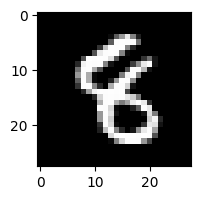

In [34]:
plt.figure(figsize=(2,2))
plt.imshow(X.iloc[4].values.reshape(28,28),cmap = 'gray')

## 2.3 决策树

In [35]:
model = DecisionTreeClassifier()
# 训练
model.fit(X_train,y_train)
# 预测值
y_pred = model.predict(X_test)
display(y_pred[:20],y_test[:20].values)
# 准确率
accuracy_score(y_test,y_pred)

array([4, 2, 1, 9, 8, 6, 7, 4, 5, 7, 7, 6, 2, 3, 2, 1, 4, 1, 7, 6],
      dtype=int64)

array([4, 2, 1, 9, 8, 6, 4, 4, 5, 7, 7, 6, 2, 3, 2, 1, 4, 1, 7, 6],
      dtype=int64)

0.786

## 2.4 随机森林 

In [36]:
%%time
model = RandomForestClassifier(n_estimators=100)
# 训练
model.fit(X_train,y_train)
# 预测
y_pred = model.predict(X_test)
display(y_pred[:20],y_test[:20].values)
# 准确率
accuracy_score(y_test,y_pred)

array([4, 2, 1, 9, 8, 6, 4, 4, 5, 7, 7, 6, 2, 3, 2, 1, 4, 1, 7, 6],
      dtype=int64)

array([4, 2, 1, 9, 8, 6, 4, 4, 5, 7, 7, 6, 2, 3, 2, 1, 4, 1, 7, 6],
      dtype=int64)

CPU times: total: 4.7 s
Wall time: 5.2 s


0.947

## 2.5 Adaboost

In [37]:
%%time
model = AdaBoostClassifier(n_estimators=100)
# 训练
model.fit(X_train,y_train)
# 预测
y_pred = model.predict(X_test)
display(y_pred[:20],y_test[:20].values)
# 准确率
accuracy_score(y_test,y_pred)

array([4, 8, 1, 9, 1, 6, 4, 9, 5, 7, 7, 6, 6, 8, 6, 1, 4, 1, 7, 6],
      dtype=int64)

array([4, 2, 1, 9, 8, 6, 4, 4, 5, 7, 7, 6, 2, 3, 2, 1, 4, 1, 7, 6],
      dtype=int64)

CPU times: total: 9.59 s
Wall time: 10.4 s


0.639

- AdaBoost表现不太好，因为手写字体识别是**多分类**问题，而AdaBoost更适合**二分类**的情况

结论：
- 手写数字的特征是像素值，特征值多大784个
- 而且像素中很多值都是0，没有特征区分度
- Adaboost对这个效果就不好
- 逻辑回归，比决策树算法效果要好一些

## 2.6 Logistic Rgression

In [38]:
%%time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# 训练
model.fit(X_train,y_train)
# 预测
y_pred = model.predict(X_test)
display(y_pred[:20],y_test[:20].values)
# 准确率
accuracy_score(y_test,y_pred)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([4, 1, 1, 9, 8, 6, 4, 4, 5, 7, 7, 6, 2, 3, 2, 1, 4, 1, 7, 6],
      dtype=int64)

array([4, 2, 1, 9, 8, 6, 4, 4, 5, 7, 7, 6, 2, 3, 2, 1, 4, 1, 7, 6],
      dtype=int64)

CPU times: total: 4.05 s
Wall time: 1.35 s


0.876

# 3. Adaboost代码模拟

## 3.1 创建数据

In [39]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn import tree
import graphviz

X = np.arange(10).reshape(-1,1)
y = np.array([1,1,1,-1,-1,-1,1,1,1,-1])
display(X,y)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

## 3.2 Adaboost建模

In [40]:
# 使用SAMME表示在构建树时，每棵树都采用相同的分裂方式
ada = AdaBoostClassifier(algorithm='SAMME',n_estimators=3)
ada.fit(X,y)

y_ = ada.predict(X)
display(y,y_)

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

## 3.3 决策树可视化

### 3.3.1 第一棵树

In [41]:
# 第一棵树
dot_data = tree.export_graphviz(ada[0],filled=True)
graph = graphviz.Source(dot_data)
y1_ = ada[0].predict(X) # 第一棵树的预测值
print(y1_)
graph.render('./第一棵树',format='png')

[ 1  1  1 -1 -1 -1 -1 -1 -1 -1]


'第一棵树.png'

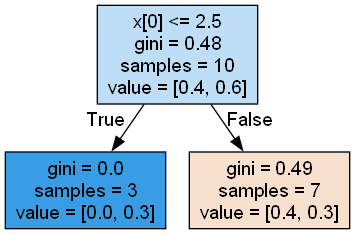

In [42]:
ada[0]  # adaboost算法中的树就是决策树

DecisionTreeClassifier(max_depth=1, random_state=884577606)

### 3.3.2 第二棵树

In [43]:
# 第二棵树
dot_data = tree.export_graphviz(ada[1],filled=True)
graph = graphviz.Source(dot_data)
y2_ = ada[1].predict(X)#第一棵树的预测值，怎么预测呢？
print(y2_)
graph.render('./第二棵树',format='png')

[ 1  1  1  1  1  1  1  1  1 -1]


'第二棵树.png'

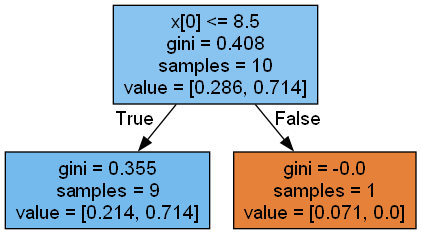

### 3.3.3 第三棵树

In [44]:
# 第三棵树
dot_data = tree.export_graphviz(ada[2],filled=True)
graph = graphviz.Source(dot_data)
y3_ = ada[2].predict(X)#第一棵树的预测值，怎么预测呢？
print(y3_)
graph.render('./第三棵树',format='png')

[-1 -1 -1 -1 -1 -1  1  1  1  1]


'第三棵树.png'

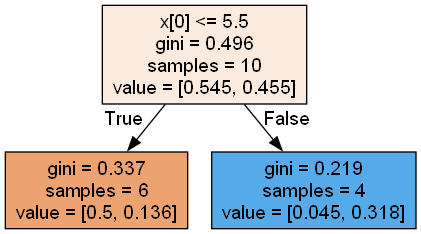

## 3.4 每棵树的权重

In [46]:
# 每棵树的权重
ada.estimator_weights_

array([0.84729786, 1.29928298, 1.5040774 ])

In [47]:
a1,a2,a3 = ada.estimator_weights_
print(a1,a2,a3)

0.8472978603872034 1.2992829841302609 1.5040773967762742


## 3.5 手动计算预测结果

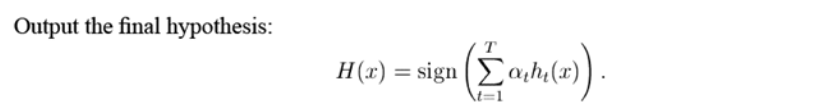

In [38]:
result = a1 * y1_ + a2 * y2_ + a3 * y3_
result

array([ 0.64250345,  0.64250345,  0.64250345, -1.05209227, -1.05209227,
       -1.05209227,  1.95606252,  1.95606252,  1.95606252, -0.64250345])

In [41]:
np.sign(result).astype('int')

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [40]:
ada.predict(X)

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])